In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
np.random.seed(1547)

Hint: What’s the easiest way to check if you’ll need to use sampling/Central Limit Theorem techniques?

For companies in SF with names that start with the letter ‘a’, 
what percentage of companies raise a funding total between $25 and $30 million?

Create a visualization that shows this on a graph of a normal distribution.  


In [28]:
df = pd.read_csv("datasets/sf_companies.csv")
df.describe()

,funded_year,raised_amount_usd,id
count,100.0000,1.000000e+02,100.000000
mean,2010.1300,1.269252e+07,25704.630000
std,2.4398,1.703946e+07,16007.196474
min,2004.0000,2.118900e+04,383.000000
25%,2009.0000,1.115000e+06,12297.500000
50%,2011.0000,4.500000e+06,21087.000000
75%,2012.0000,1.360000e+07,38919.250000
max,2014.0000,5.000000e+07,56910.000000


In [51]:
def get_sample(dataset, n=30):
    """Grabs a random subsample of size 'n' from dataset.
    Outputs the mean of the subsample."""
    subsample = np.random.choice(dataset, size=n)
    mean = np.mean(subsample)
    return mean

def create_sample_distribution(dataset, size=100):
    """Creates a dataset of subsample means.  The length of the dataset is specified by the 'size' 
    keyword argument. Should return the entire sample distribution as a numpy array.  """
    sample_mean = []
    for i in range(size):
        sample_mean.append(get_sample(dataset))
    return sample_mean

In [77]:
funding_df = df['raised_amount_usd']
pd.set_option('float_format', '{:f}'.format)

funding_df.describe()

count        100.000000
mean    12692522.140000
std     17039458.087143
min        21189.000000
25%      1115000.000000
50%      4500000.000000
75%     13600000.000000
max     50000000.000000
Name: raised_amount_usd, dtype: float64

In [79]:
mean = 12692522.140000
std = 17039458.087143
z_score_25 = (25000000- mean) / std
z_score_30 = (30000000 - mean) / std

left_tail_25 = st.norm.cdf(z_score_25)
left_tail_30 = st.norm.cdf(z_score_30)

total = left_tail_30 - left_tail_25

total


0.080178098539950393

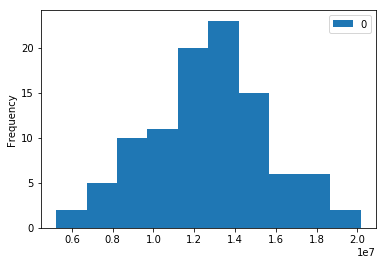

In [76]:
sample = create_sample_distribution(funding_df)
sample_df = pd.DataFrame(sample)
sample_df.plot.hist()